In [1]:
library(GLMsData)
library(statmod)
library(MASS)
library(splines)

Warning message:
"package 'statmod' was built under R version 3.6.3"

In [2]:
data(fluoro)

In [3]:
str(fluoro)

'data.frame':	19 obs. of  2 variables:
 $ Time: int  37 48 52 57 58 61 66 67 75 75 ...
 $ Dose: num  4.39 3.46 8 5.47 8 ...


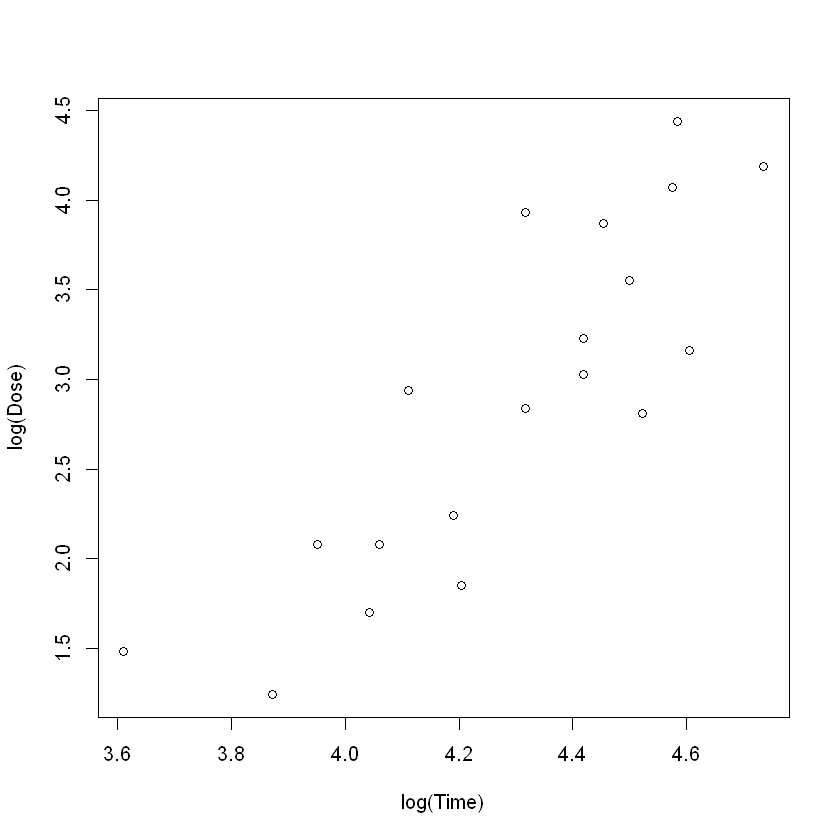

In [5]:
plot(log(Dose) ~ log(Time), data=fluoro)

In [6]:
glm.1 <- glm(Dose ~ log(Time), data=fluoro, family = Gamma(link="log"))

In [7]:
coef(summary(glm.1))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-9.246166,1.8809512,-4.915686,1.307676e-04
log(Time),2.856390,0.4375853,6.527619,5.165644e-06


In [8]:
anova(glm.1, test="F")

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
NULL,NA,NA,18,15.581998,NA,NA
log(Time),1,10.84978,17,4.732218,36.78534,1.2617e-05


In [9]:
gof.dev <- deviance(glm.1)
gof.pearson <- sum(glm.1$weights * glm.1$residuals^2)

pchisq(gof.dev, df=df.residual(glm.1), lower.tail = FALSE)
pchisq(gof.pearson, df=df.residual(glm.1), lower.tail = FALSE)

gof.dev / df.residual(glm.1)
gof.pearson / df.residual(glm.1)

[1] 0.9984316

[1] 0.9977307

[1] 0.2783658

[1] 0.2949485


	Shapiro-Wilk normality test

data:  qr1
W = 0.95792, p-value = 0.5321


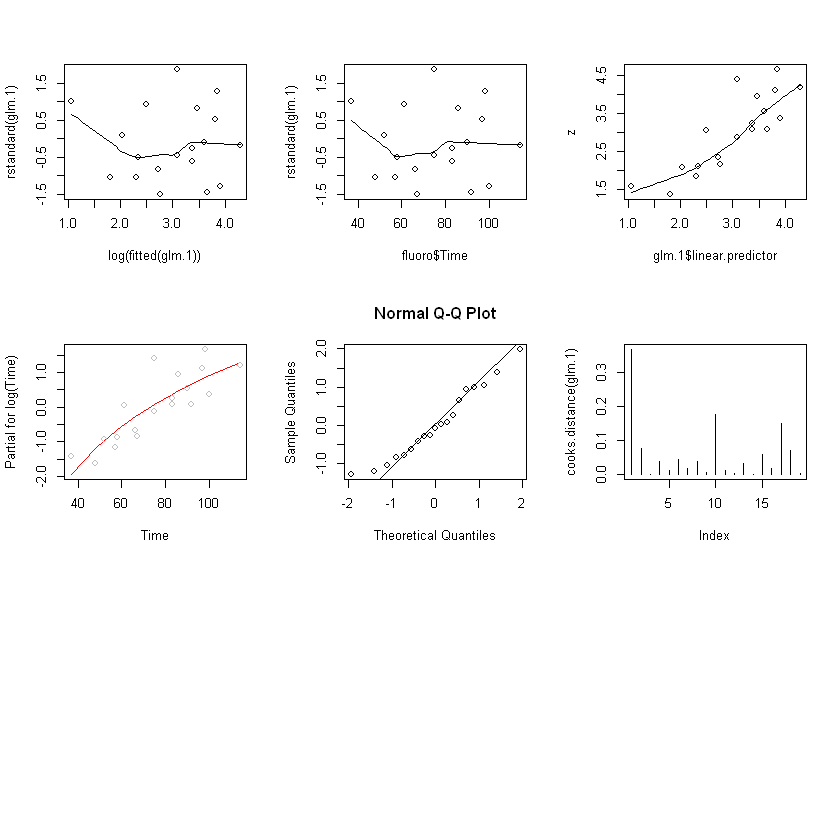

In [10]:
par(mfrow=c(3, 3))

scatter.smooth(rstandard(glm.1) ~ log(fitted(glm.1)))
scatter.smooth(rstandard(glm.1) ~ fluoro$Time)
z <- resid(glm.1, type="working") + glm.1$linear.predictor
scatter.smooth(z ~ glm.1$linear.predictor)
termplot(glm.1, partial.resid = TRUE, terms="log(Time)")
qqnorm(qr1 <- qresid(glm.1))
qqline(qr1)
plot(cooks.distance(glm.1), type="h")
shapiro.test(qr1)

In [11]:
colSums(influence.measures(glm.1)$is.inf)

dfb.1_ dfb.l(T)    dffit    cov.r   cook.d      hat 
       0        0        0        2        0        1

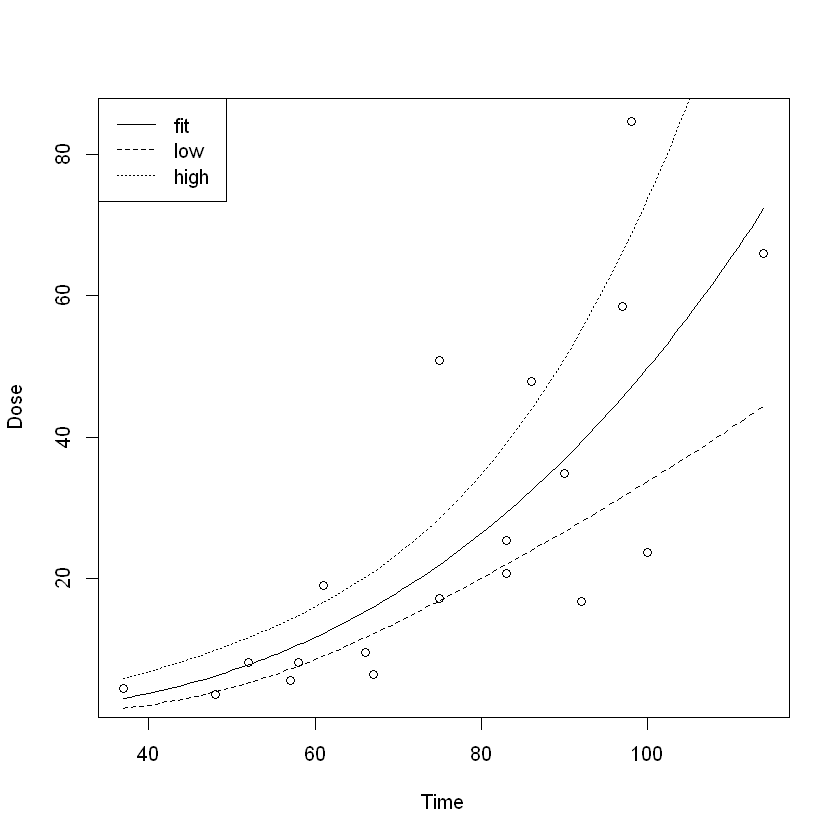

In [13]:
newTime <- seq(min(fluoro$Time), max(fluoro$Time), length=100)
fit <- predict(glm.1, newdata=data.frame(Time=newTime), se.fit=TRUE)
t.star <- qt(0.975, df=df.residual(glm.1))
ci.lo <- exp(fit$fit - t.star*fit$se.fit)
ci.hi <- exp(fit$fit + t.star*fit$se.fit)

plot(Dose ~ Time, data=fluoro)
lines(exp(fit$fit) ~ newTime, lty=1)
lines(ci.lo ~ newTime, lty=2)
lines(ci.hi ~ newTime, lty=3)
legend("topleft", lty=c(1, 2, 3), legend=c("fit", "low", "high"))